In [1]:
import ast
import csv
import os
import sys
from pickle import dump

import numpy as np
from tfsnippet.utils import makedirs

import pandas as pd
import matplotlib.pyplot as plt
import pprint, pickle


In [2]:
dataset_folder = 'ServerMachineDataset'
file_list = os.listdir(os.path.join(dataset_folder, "train"))


In [3]:
filename = 'machine-3-3.txt'
temp = np.genfromtxt(os.path.join(dataset_folder, 'train', filename),
                         dtype=np.float32,
                         delimiter=',')
train = pd.DataFrame(temp)

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(train[0])
plt.legend()
plt.show()

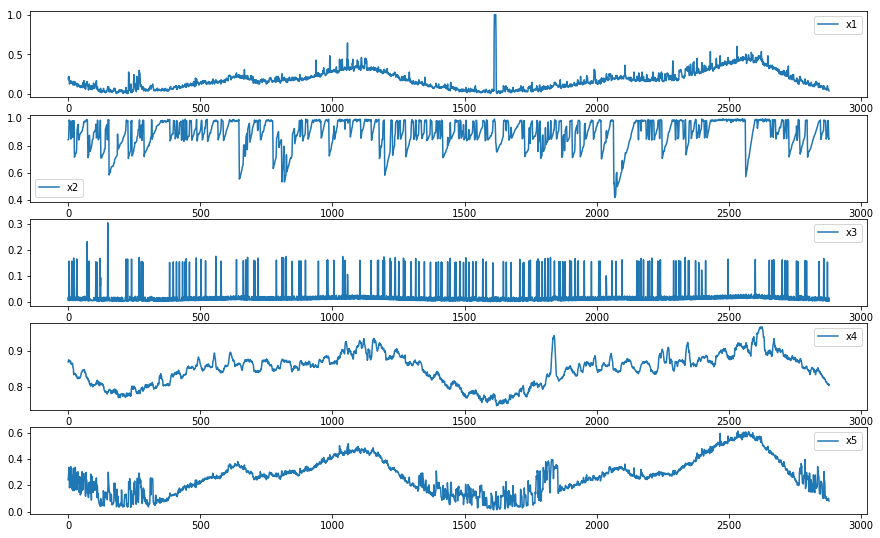

In [15]:
plt.figure(figsize=(15,15))
ax1 = plt.subplot(8,1,1)
ax1.plot(train[0][:2880],label='x1')
plt.legend()

ax1 = plt.subplot(8,1,2)
ax1.plot(train[5][:2880],label='x2')
plt.legend()

ax1 = plt.subplot(8,1,3)
ax1.plot(train[15][:2880],label='x3')
plt.legend()

ax1 = plt.subplot(8,1,4)
ax1.plot(train[23][:2880],label='x4')
plt.legend()

ax1 = plt.subplot(8,1,5)
ax1.plot(train[34][:2880],label='x5')
plt.legend()
plt.savefig('./images/data_show.pdf')
plt.show()

In [5]:
x = train[0].copy()
d1 = np.quantile(x,.25)
d3 = np.quantile(x,.75)
gap = d3-d1
min_ = d1-3*gap
max_ = d3 + 3 * gap

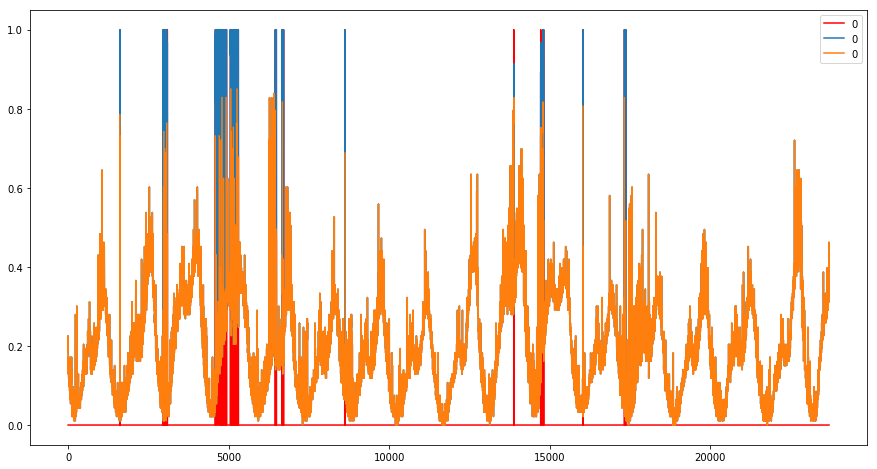

In [6]:
index = ((x < min_ ) | (x > max_))
x[index] = np.nan
plt.figure(figsize=(15,8))
plt.plot(index, color='r')
plt.plot(train[0])
plt.plot(x)
plt.legend()
plt.show()

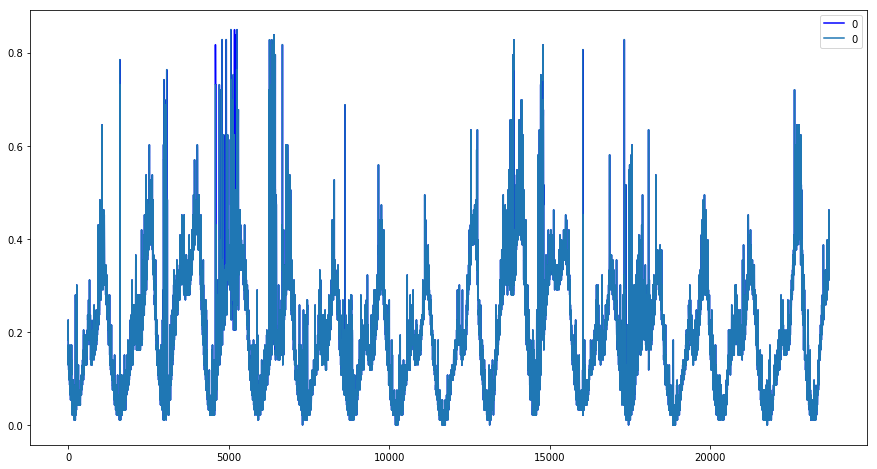

In [7]:
y = x.interpolate(method='nearest', inplace=False)

plt.figure(figsize=(15,8))
plt.plot(y,color='b')
plt.plot(x)
plt.legend()
plt.show()

In [13]:
t = train.values

In [15]:
t.shape

(28479, 38)

In [43]:
test_label = np.genfromtxt(os.path.join(dataset_folder, 'test_label', filename),
                         dtype=np.float32,
                         delimiter=',')
test_label = pd.DataFrame(test_label)

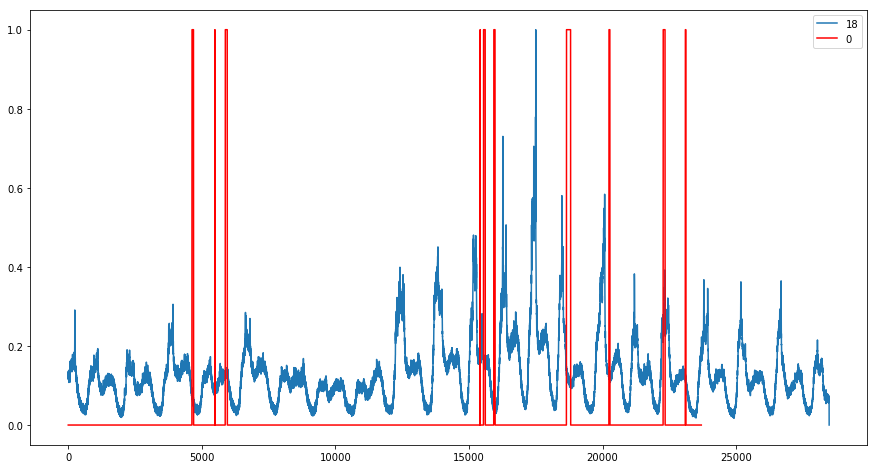

In [50]:
plt.figure(figsize=(15,8))
plt.plot(test[18])
plt.plot(test_label[0],color='r')
plt.legend()
plt.show()

<Figure size 720x576 with 0 Axes>

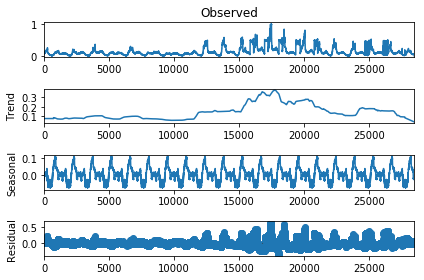

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

res = seasonal_decompose(data[0].values, period=1440, extrapolate_trend='freq')
plt.figure(figsize=(10,8))
res.plot()
plt.show()

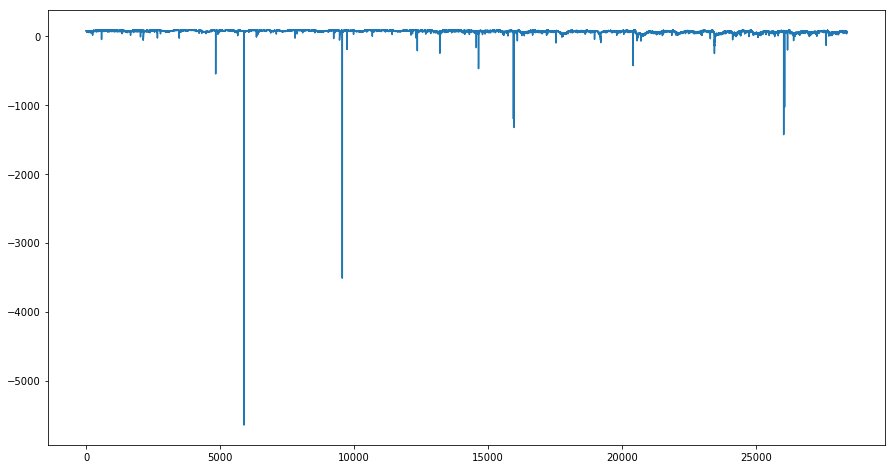

In [31]:
pkl_file2 = open('./result/train_score.pkl', 'rb')
data2 = pickle.load(pkl_file2)
plt.figure(figsize=(15,8))
plt.plot(data2)
plt.show()
pkl_file2.close()